# Task 2 Unemploymet Analysis

In [35]:
#Importing all the essential libraries for our project

import numpy as np3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [36]:
# Specify the file paths correctly
file = "DataSet/Unemployment in India.csv"

# Read the CSV files into DataFrames
df = pd.read_csv(file)

# Print the merged DataFrame
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [37]:
# check missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [39]:
# Check for missing values
"Missing values in the dataset:", df.isnull().sum()

('Missing values in the dataset:',
 Region                                      28
  Date                                       28
  Frequency                                  28
  Estimated Unemployment Rate (%)            28
  Estimated Employed                         28
  Estimated Labour Participation Rate (%)    28
 Area                                        28
 dtype: int64)

In [40]:
# Data Preprocessing
# Convert the 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [41]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [42]:
# Renaming columns for easier access, if necessary
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [43]:
# Exploratory Data Analysis (EDA)
# Summary statistics
"Summary statistics:", df.describe()

('Summary statistics:',
        estimated_unemployment_rate_(%)  estimated_employed  \
 count                       740.000000        7.400000e+02   
 mean                         11.787946        7.204460e+06   
 std                          10.721298        8.087988e+06   
 min                           0.000000        4.942000e+04   
 25%                           4.657500        1.190404e+06   
 50%                           8.350000        4.744178e+06   
 75%                          15.887500        1.127549e+07   
 max                          76.740000        4.577751e+07   
 
        estimated_labour_participation_rate_(%)  
 count                               740.000000  
 mean                                 42.630122  
 std                                   8.111094  
 min                                  13.330000  
 25%                                  38.062500  
 50%                                  41.160000  
 75%                                  45.505000  
 max   

In [44]:
"Updated column names in the dataset:", df.columns

('Updated column names in the dataset:',
 Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
        'estimated_employed', 'estimated_labour_participation_rate_(%)',
        'area'],
       dtype='object'))

C:\Users\markn\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\markn\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



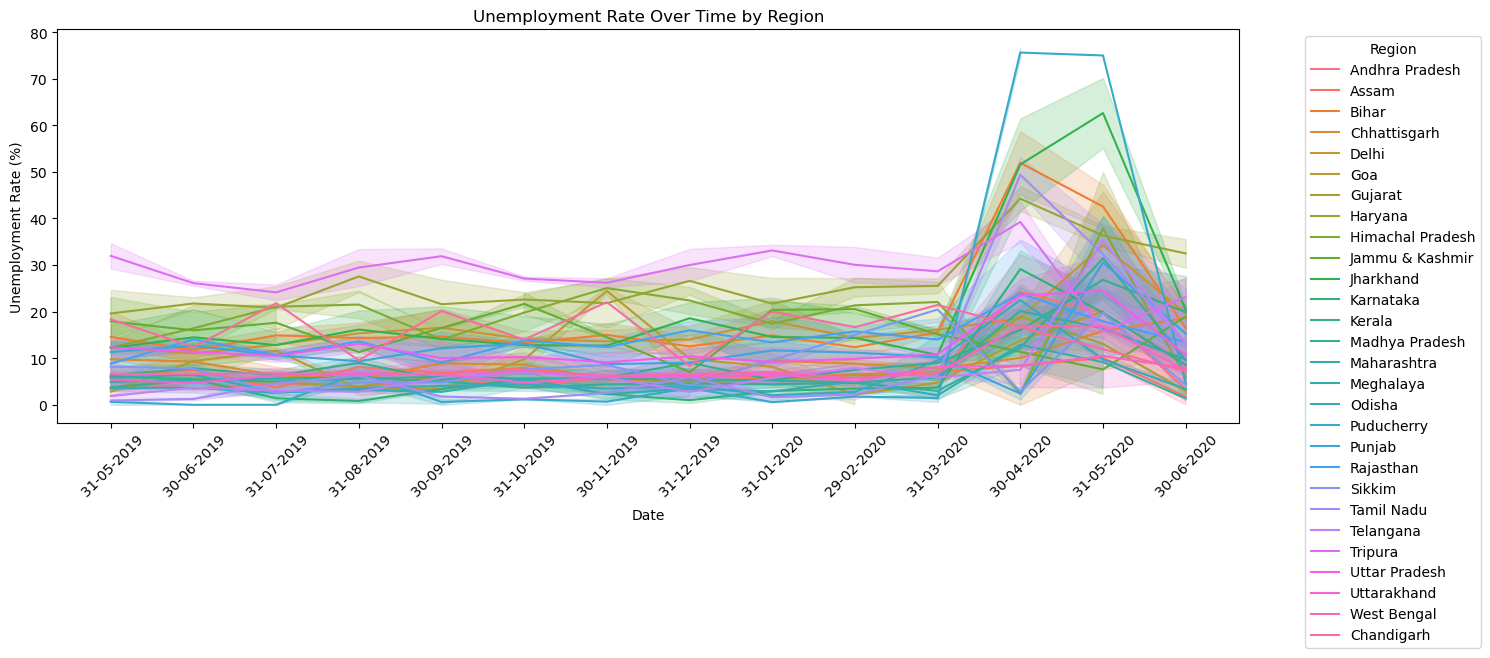

In [45]:
# Plotting the unemployment rate over time for the entire country
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_(%)', hue='region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Ensure the 'estimated_unemployment_rate_(%)' column is numeric
df['estimated_unemployment_rate_(%)'] = pd.to_numeric(df['estimated_unemployment_rate_(%)'], errors='coerce')

# Remove any rows with NaN values that may have been introduced
df.dropna(subset=['estimated_unemployment_rate_(%)'], inplace=True)

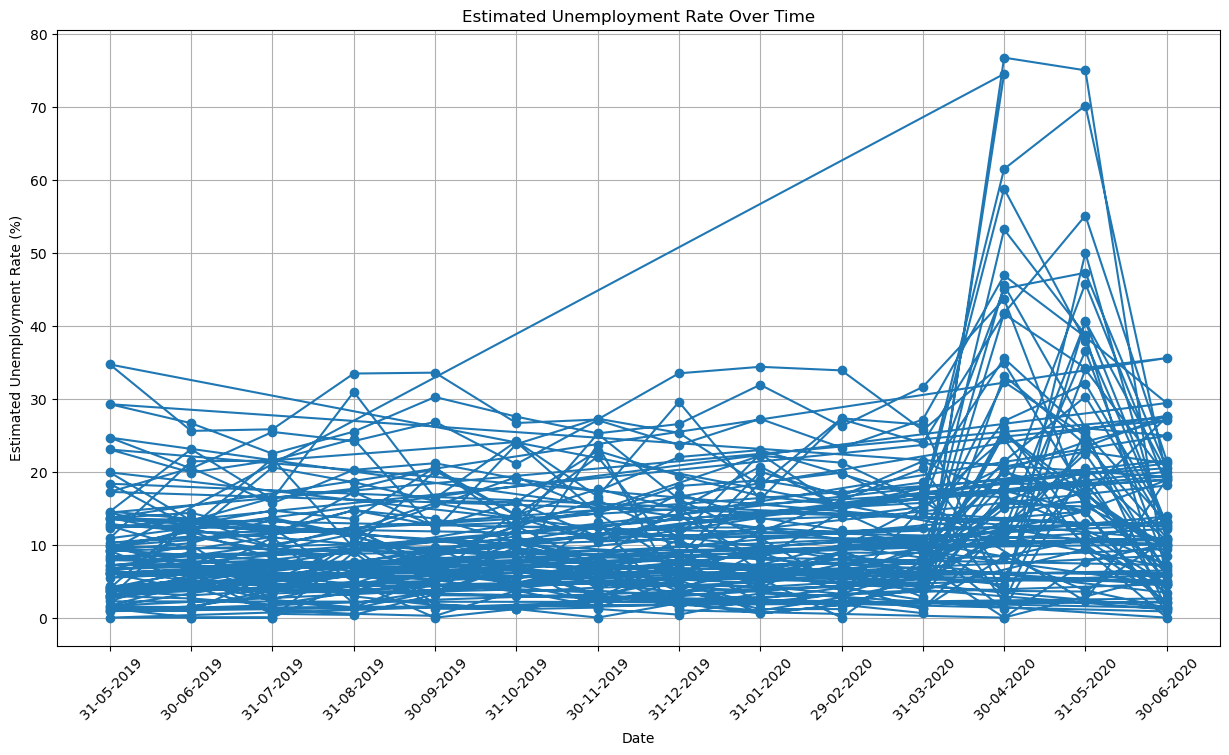

In [47]:
# Plotting the unemployment rate over time
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['estimated_unemployment_rate_(%)'], marker='o')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

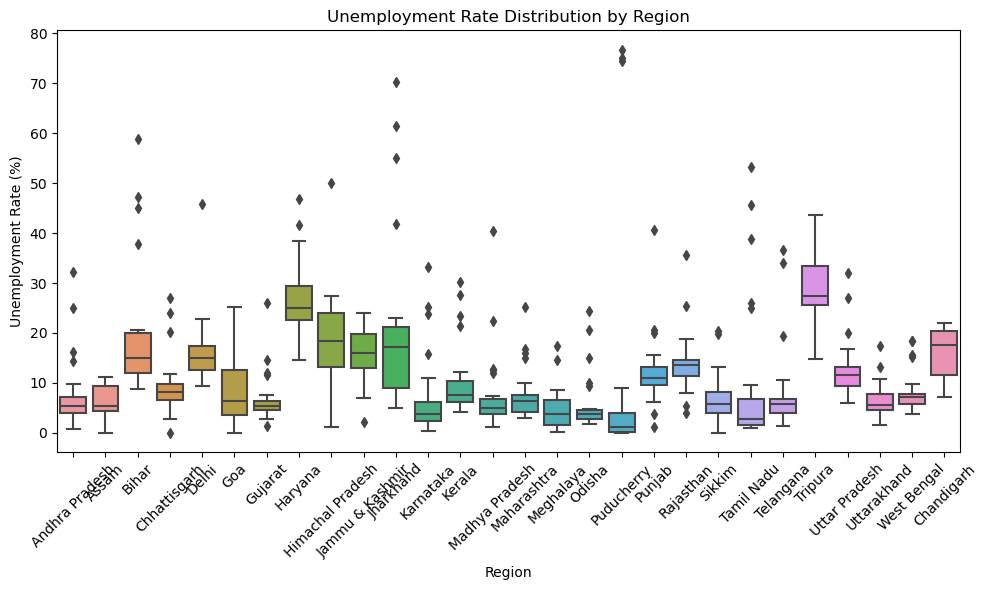

In [48]:
# Plotting the unemployment rate by region using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='estimated_unemployment_rate_(%)')
plt.title('Unemployment Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

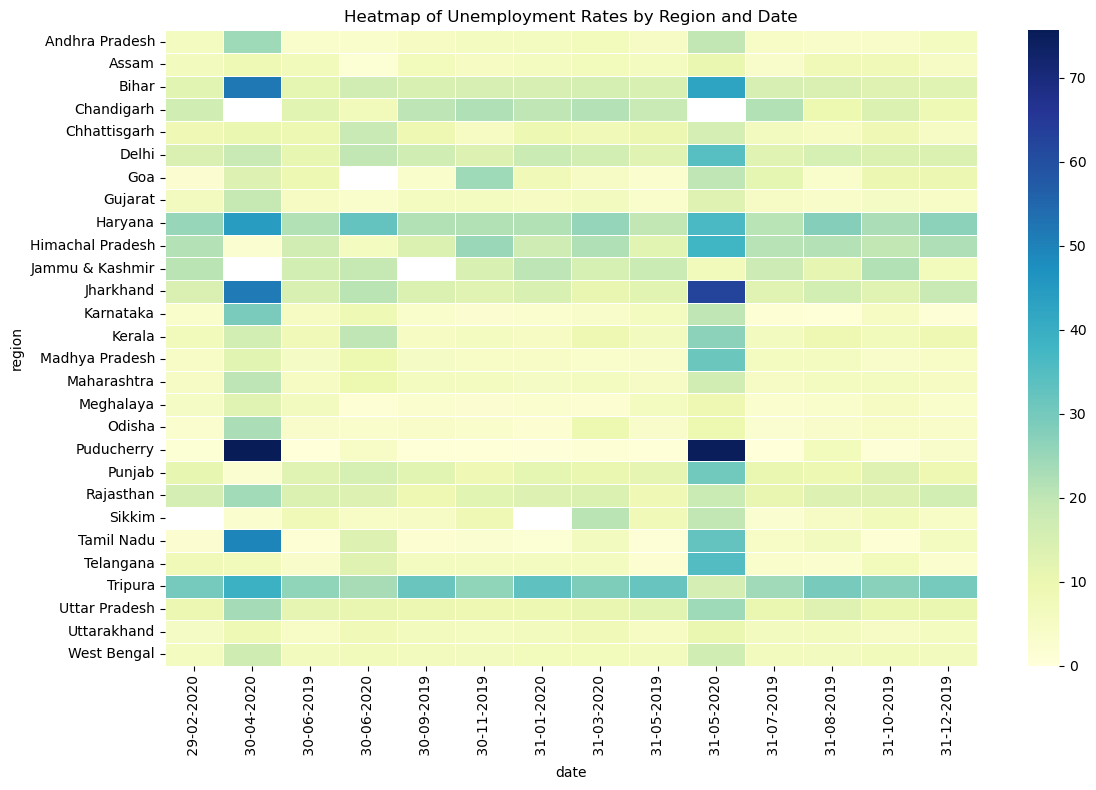

In [49]:
# Heatmap to visualize unemployment rates across different regions and months
df_pivot = df.pivot_table(index='region', columns='date', values='estimated_unemployment_rate_(%)')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Heatmap of Unemployment Rates by Region and Date')
plt.xlabel('date')
plt.ylabel('region')
plt.tight_layout()
plt.show()

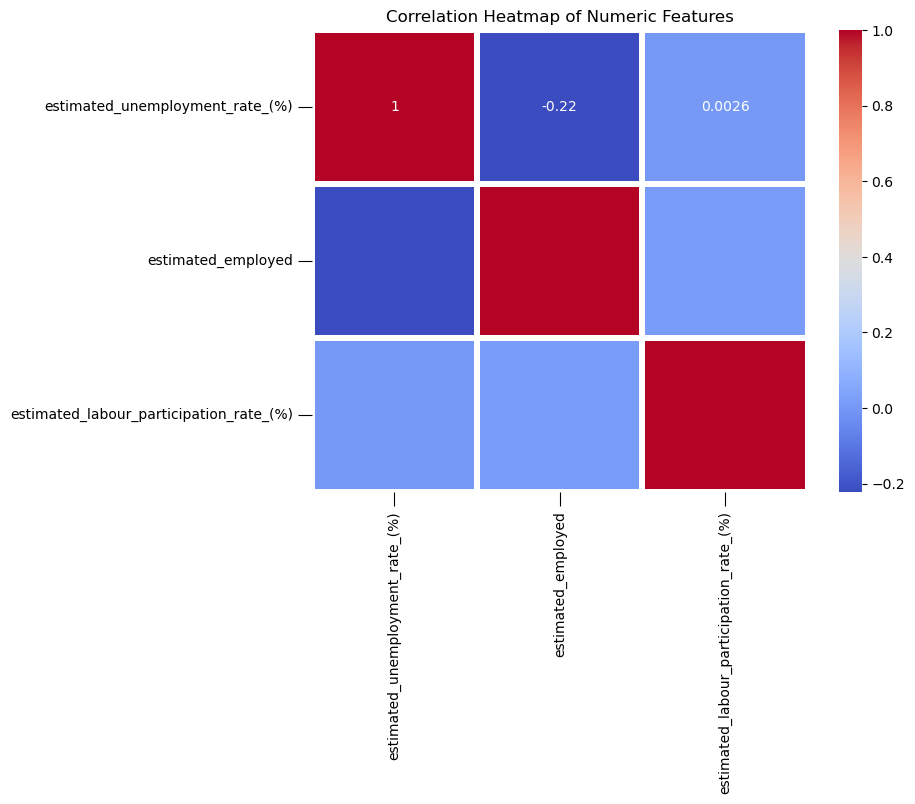

In [50]:
# Filter the dataframe to only include numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=3, cmap='coolwarm')

# Customize the tick parameters
ax.tick_params(size=10, color='black', labelsize=10, labelcolor='black')

plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [51]:
print(df.columns)
len(df.columns)

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')


7

C:\Users\markn\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



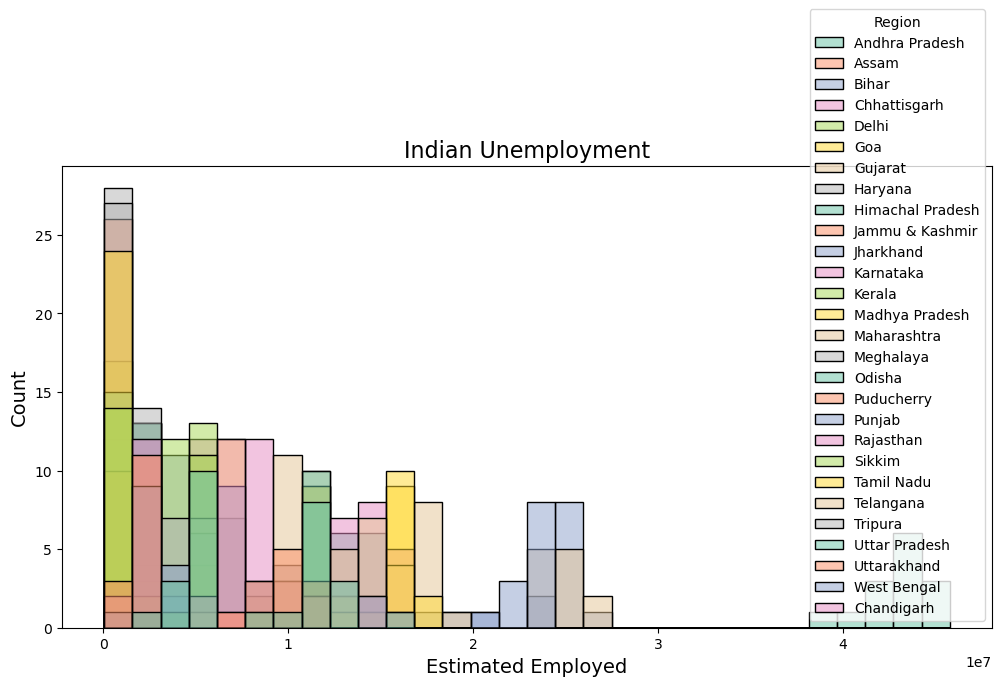

In [52]:
# Load and rename columns (if not already done)
df.columns = ['Region', ' Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area']

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.title('Indian Unemployment', fontsize=16)
sns.histplot(x='Estimated Employed', hue='Region', data=df, palette="Set2", kde=False, bins=30)
plt.xlabel('Estimated Employed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [53]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [54]:
df[['Region', 'Area']].isnull().sum()

Region    0
Area      0
dtype: int64

In [55]:
new_df = df.dropna(subset=['Region', 'Area'])
duplicate_paths = df[df.duplicated(['Region', 'Area'])]
print(duplicate_paths)

             Region         Date Frequency  Estimated Unemployment Rate (%)  \
1    Andhra Pradesh   30-06-2019   Monthly                             3.05   
2    Andhra Pradesh   31-07-2019   Monthly                             3.75   
3    Andhra Pradesh   31-08-2019   Monthly                             3.32   
4    Andhra Pradesh   30-09-2019   Monthly                             5.17   
5    Andhra Pradesh   31-10-2019   Monthly                             3.52   
..              ...          ...       ...                              ...   
749     West Bengal   29-02-2020   Monthly                             7.55   
750     West Bengal   31-03-2020   Monthly                             6.67   
751     West Bengal   30-04-2020   Monthly                            15.63   
752     West Bengal   31-05-2020   Monthly                            15.22   
753     West Bengal   30-06-2020   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participa

In [56]:
print(df.dtypes)

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object


In [57]:
df['Region'] = df['Region'].astype(str)
df['Area'] = df['Area'].astype(str)

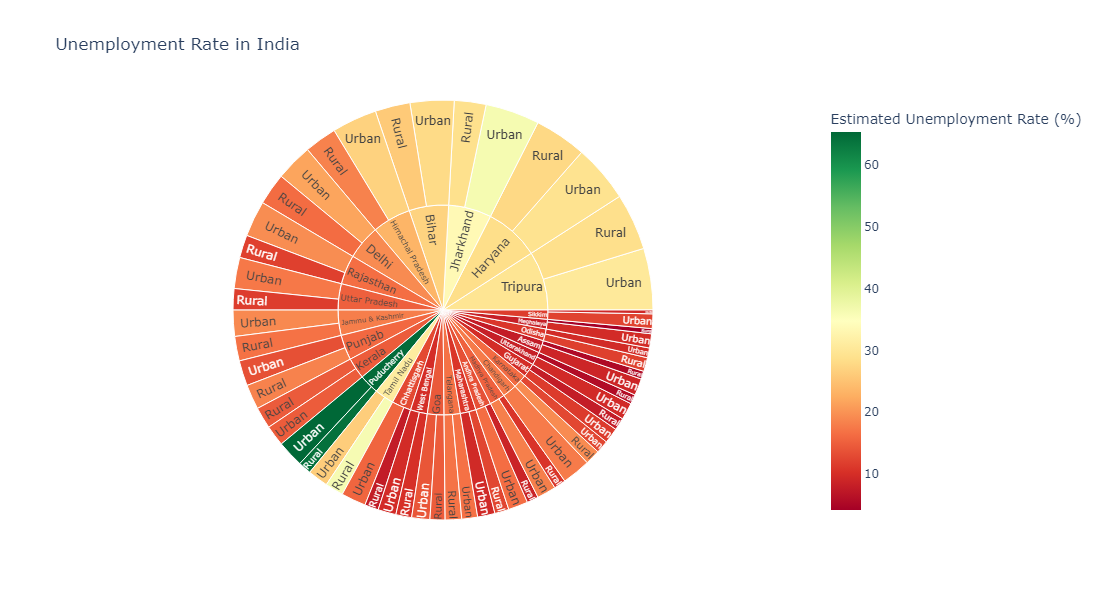

In [58]:
# plotting sunburst
import plotly.express as px

# Create the sunburst plot
figure = px.sunburst(df, 
                     path=['Region', 'Area'], 
                     values='Estimated Unemployment Rate (%)', 
                     width=700, 
                     height=600, 
                     color='Estimated Unemployment Rate (%)',
                     color_continuous_scale='RdYlGn',
                     title="Unemployment Rate in India")

# Show the plot
figure.show()
